#**Project Overview**
---
This project aims to create and compare model that could be used to predict housing prices based on certain variables, such as the number of bathrooms, bedrooms, and many others. It should be noted that whilst the data is sourced from kaggle, it is downloaded and placed in github, thus, making it easier to access

**Data source**: https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression/data

In this project, there are several steps taken, including:
1. Importing Libraries
2. Data Loading
3. Exploratory Data Analysis (EDA)
4. Data Cleaning
5. Data Preparation
6. Modelling

##**1. Importing Libraries**
---
The libraries used in this project are as follows:

In [21]:
# Data processing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Model libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

##**2. Loading Data**
---
This dataset, as explained previously, describes the proce of real estate based on certain features. The details of said features are explained below:
1. **ID**: A unique identifier for each property.
2. **Square_Feet**: The area of the property in square meters.
3. **Num_Bedrooms**: The number of bedrooms in the property.
4. **Num_Bathrooms**: The number of bathrooms in the property.
5. **Num_Floors**: The number of floors in the property.
6. **Year_Built**: The year the property was built.
7. **Has_Garden**: Indicates whether the property has a garden (1 for yes, 0 for no).
8. **Has_Pool**: Indicates whether the property has a pool (1 for yes, 0 for no).
9. **Garage_Size**: The size of the garage in square meters.
10. **Location_Score**: A score from 0 to 10 indicating the quality of the neighborhood (higher scores indicate better neighborhoods).
11. **Distance_to_Center**: The distance from the property to the city center in kilometers.
12. **Price**: The target variable that represents the price of the property. This is the value we aim to predict.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/real_estate_dataset.csv')
df.head(5)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


##**3. Exploratory Data Analysis**
---
In this step, here are some of the things done in order to understand the data:
1. Data overview
2. Descriptive statistics
3. Missing value detection
4. Duplicated value detection
5. Outlier detection
6. Data distribution
7. Data correlation analysis

###Data overview
Based on the output of the code below, the dataset contains 500 observations with entirely numerical data. It can be said that the data does not seem to have any mistaken data types or missing values.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


###Descriptive Statistics

In [24]:
df.describe(include='all')

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


###Missing Value Detection

In [25]:
df.isna().sum()

# No missing values are detected, thus, it would not be necessary to do any missing value handling

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


###Duplicated Value Detection

In [26]:
df.duplicated().sum()

# None of the data is dupicated, thus, there is no need for duplicated data handling

np.int64(0)

###Outlier Detection

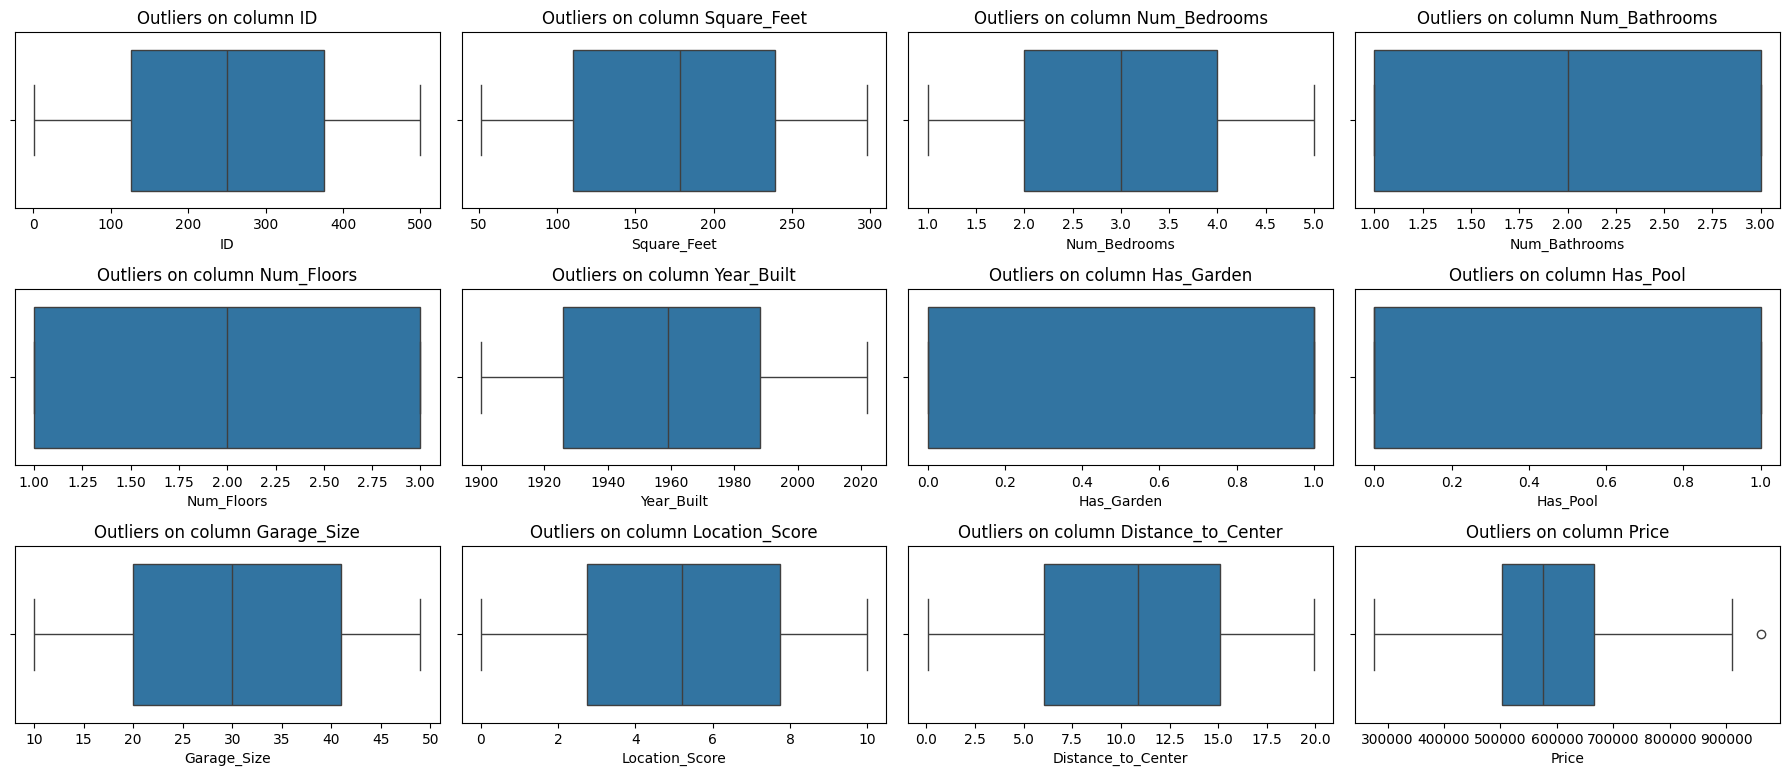

In [27]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(df.columns):
  plt.subplot(4, 4, i + 1)
  sns.boxplot(x=df[col])
  plt.title(f'Outliers on column {col}')
plt.tight_layout()
plt.show()

In [28]:
for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  df_outlier = df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))]
  print(f'Outlier on column {col}:\n{df_outlier[col]}\n')

Outlier on column ID:
Series([], Name: ID, dtype: int64)

Outlier on column Square_Feet:
Series([], Name: Square_Feet, dtype: float64)

Outlier on column Num_Bedrooms:
Series([], Name: Num_Bedrooms, dtype: int64)

Outlier on column Num_Bathrooms:
Series([], Name: Num_Bathrooms, dtype: int64)

Outlier on column Num_Floors:
Series([], Name: Num_Floors, dtype: int64)

Outlier on column Year_Built:
Series([], Name: Year_Built, dtype: int64)

Outlier on column Has_Garden:
Series([], Name: Has_Garden, dtype: int64)

Outlier on column Has_Pool:
Series([], Name: Has_Pool, dtype: int64)

Outlier on column Garage_Size:
Series([], Name: Garage_Size, dtype: int64)

Outlier on column Location_Score:
Series([], Name: Location_Score, dtype: float64)

Outlier on column Distance_to_Center:
Series([], Name: Distance_to_Center, dtype: float64)

Outlier on column Price:
150    960678.274291
Name: Price, dtype: float64



Based on this, it could be said that there is very little outlier on this dataset. However, this singular outlier would need to be handled later

###Data Distribution

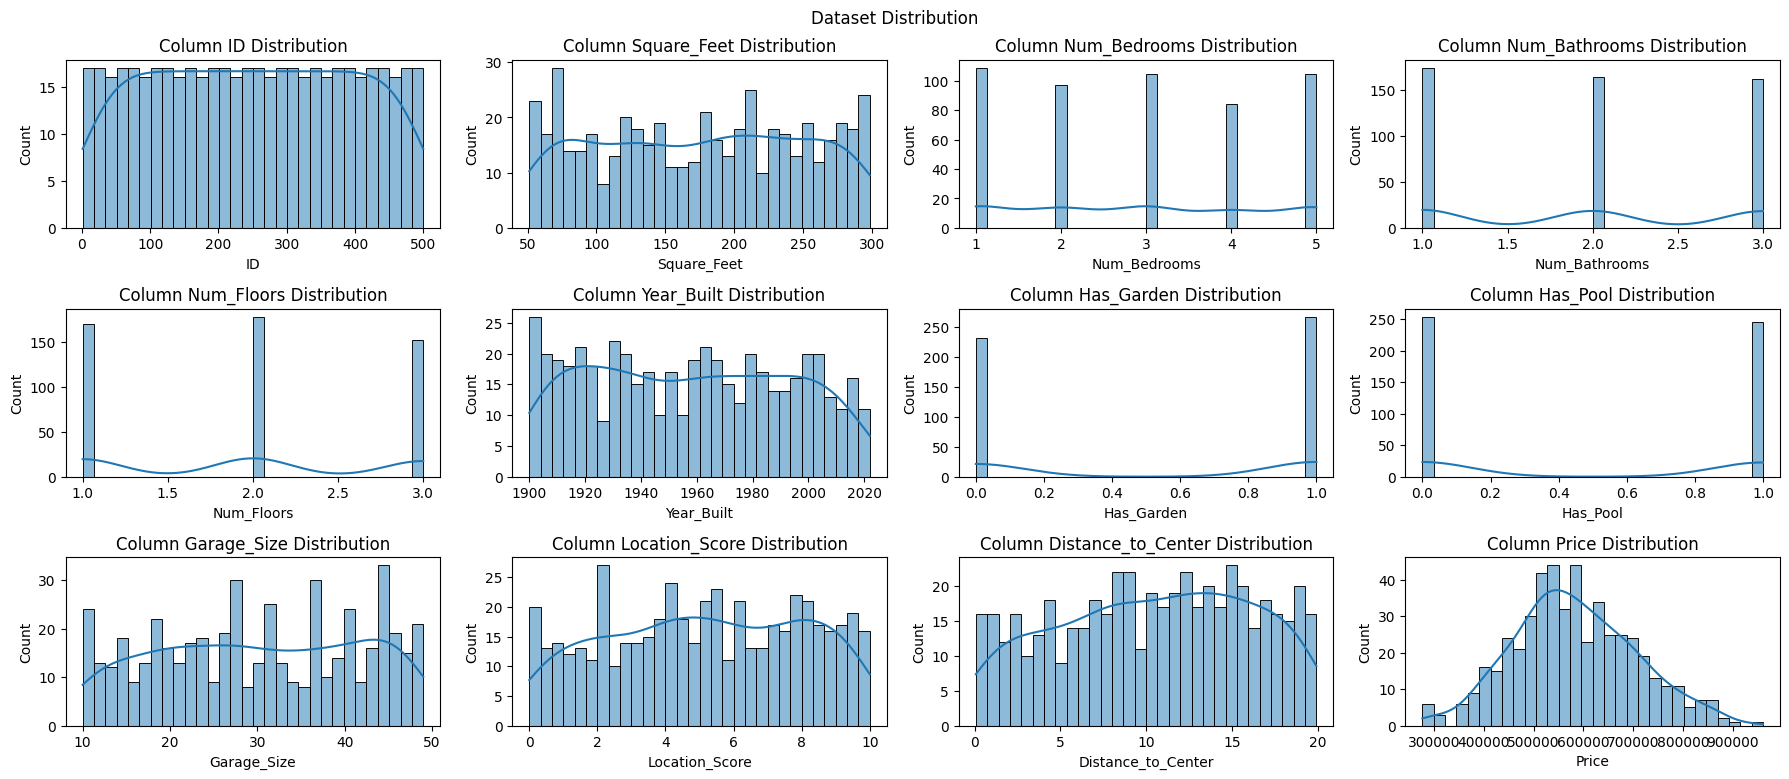

In [29]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(df.columns):
  plt.subplot(4, 4, i + 1)
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Column {col} Distribution')
plt.suptitle('Dataset Distribution')
plt.tight_layout()
plt.show()

###Data Correlation Analysis

<Figure size 1800x1000 with 0 Axes>

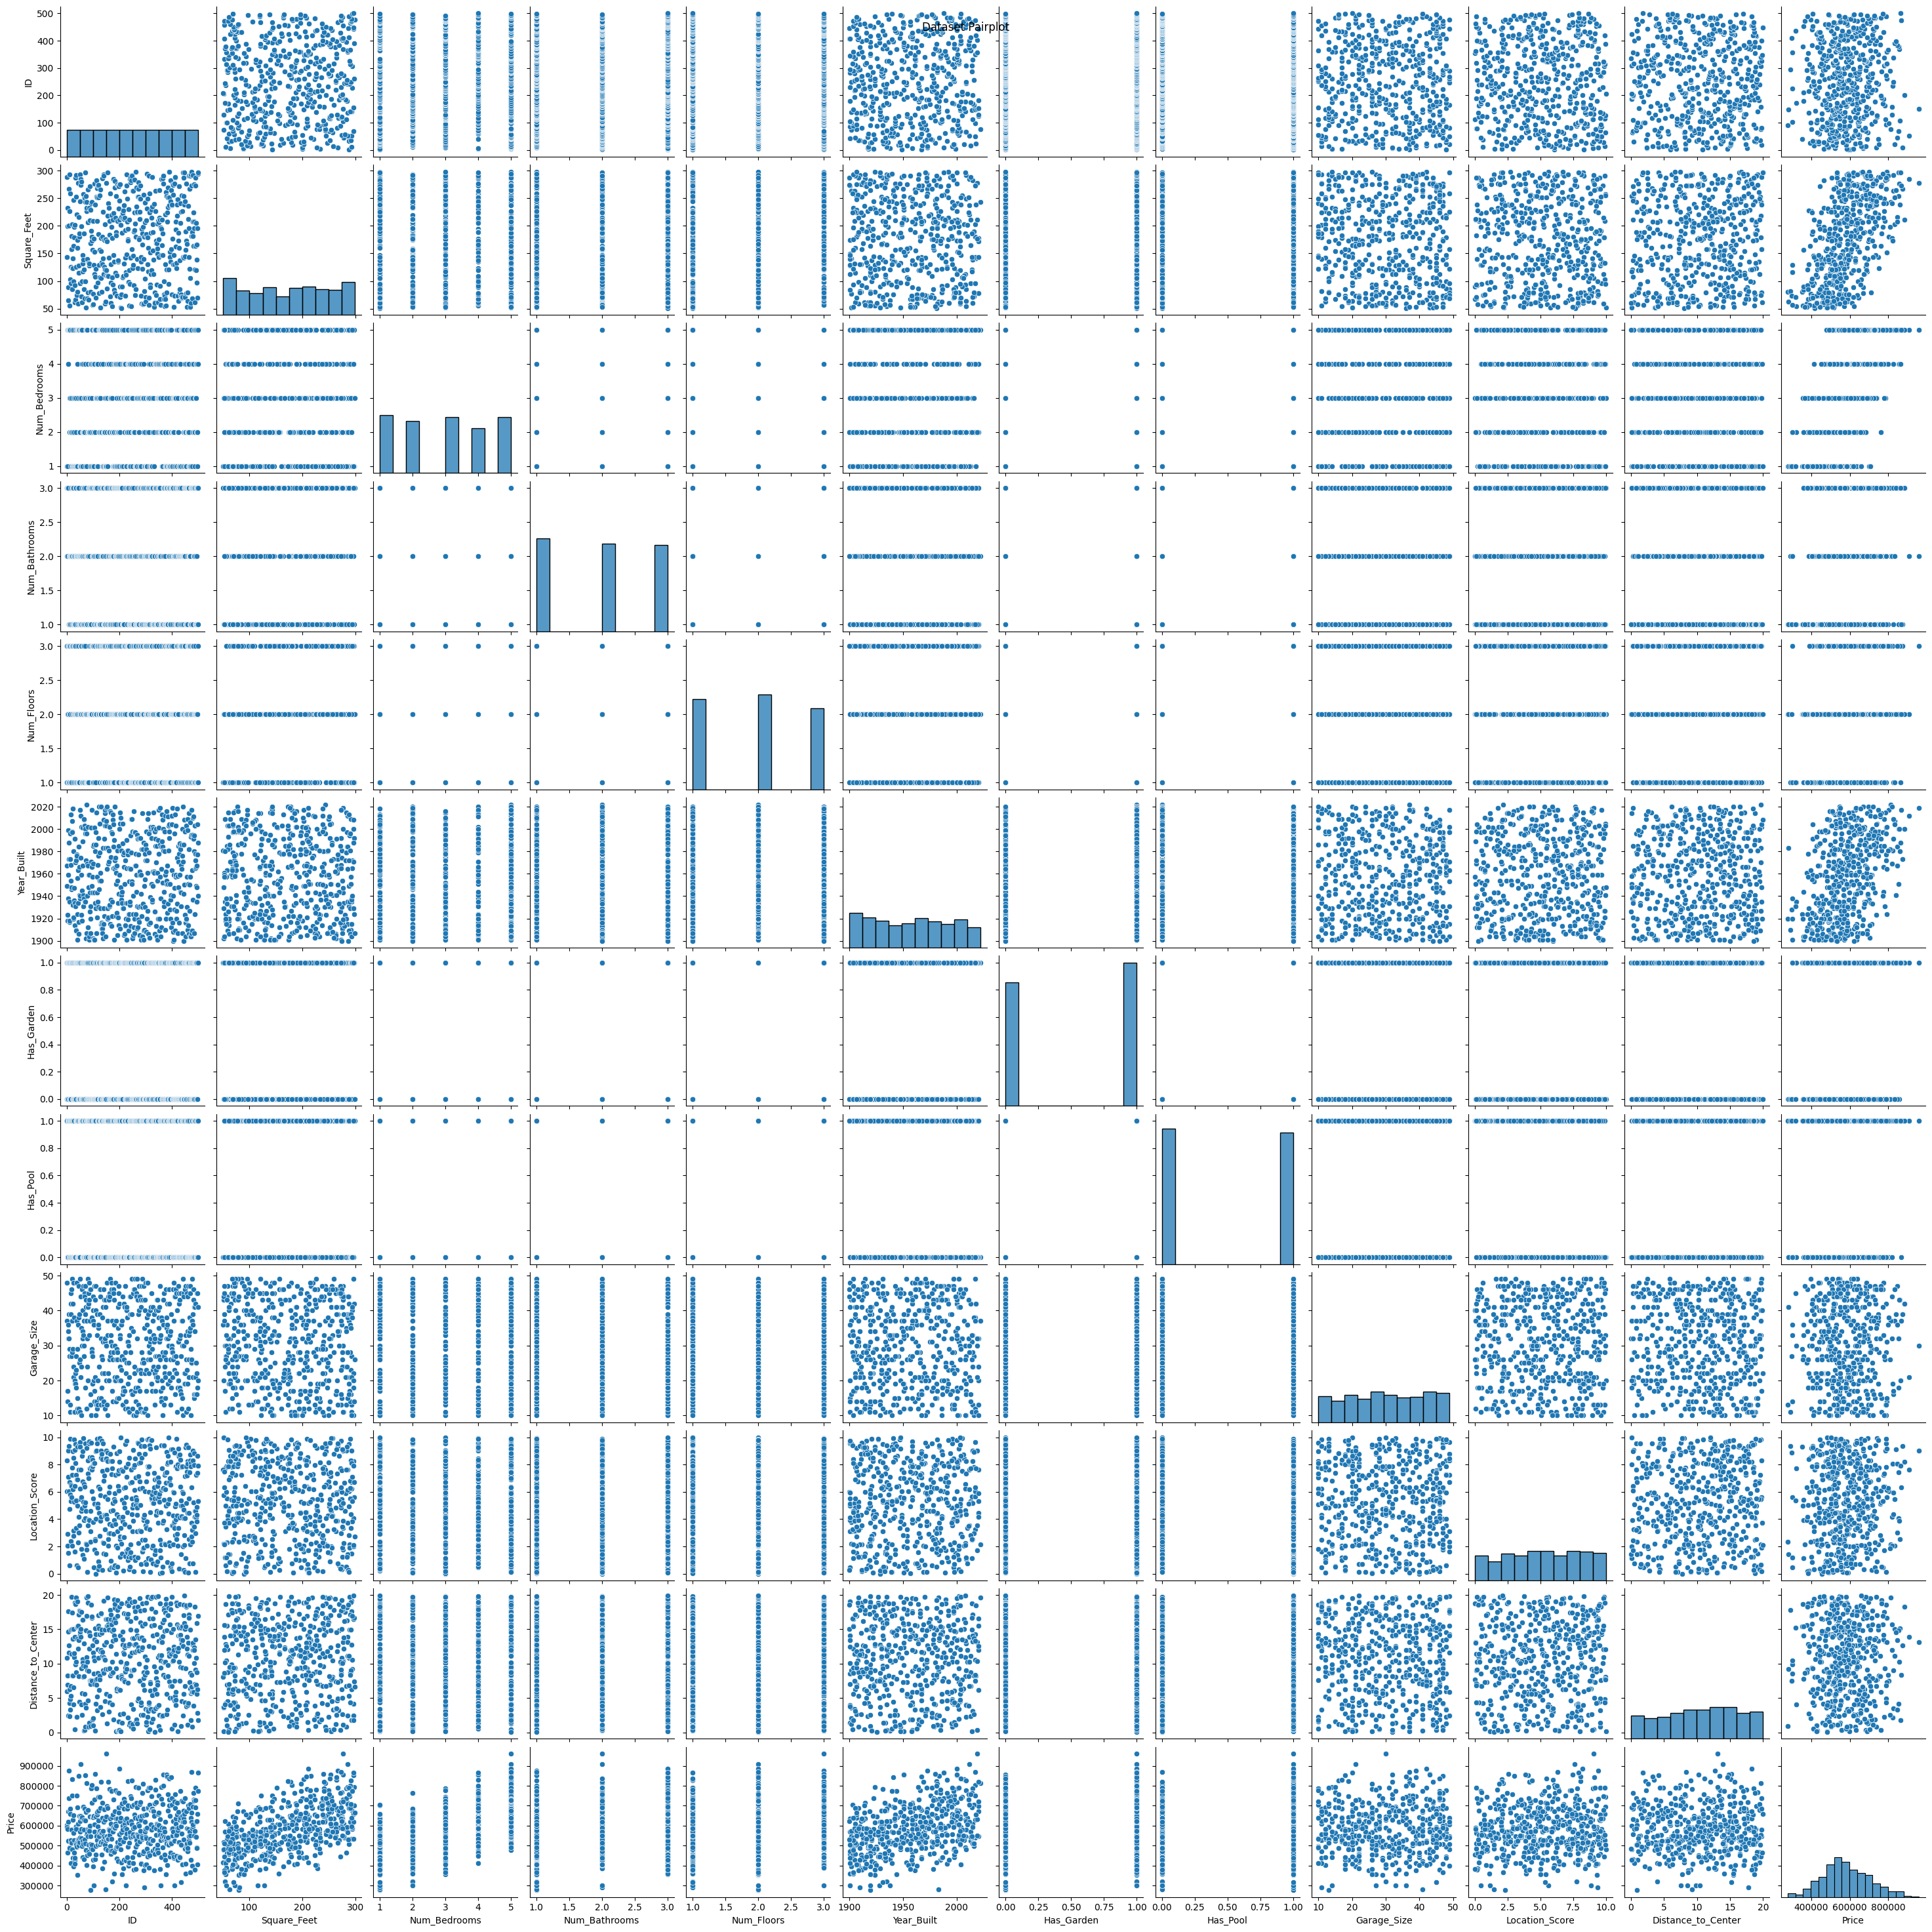

In [30]:
plt.figure(figsize=(18, 10))
sns.pairplot(df)
plt.suptitle('Dataset Pairplot')
plt.show()

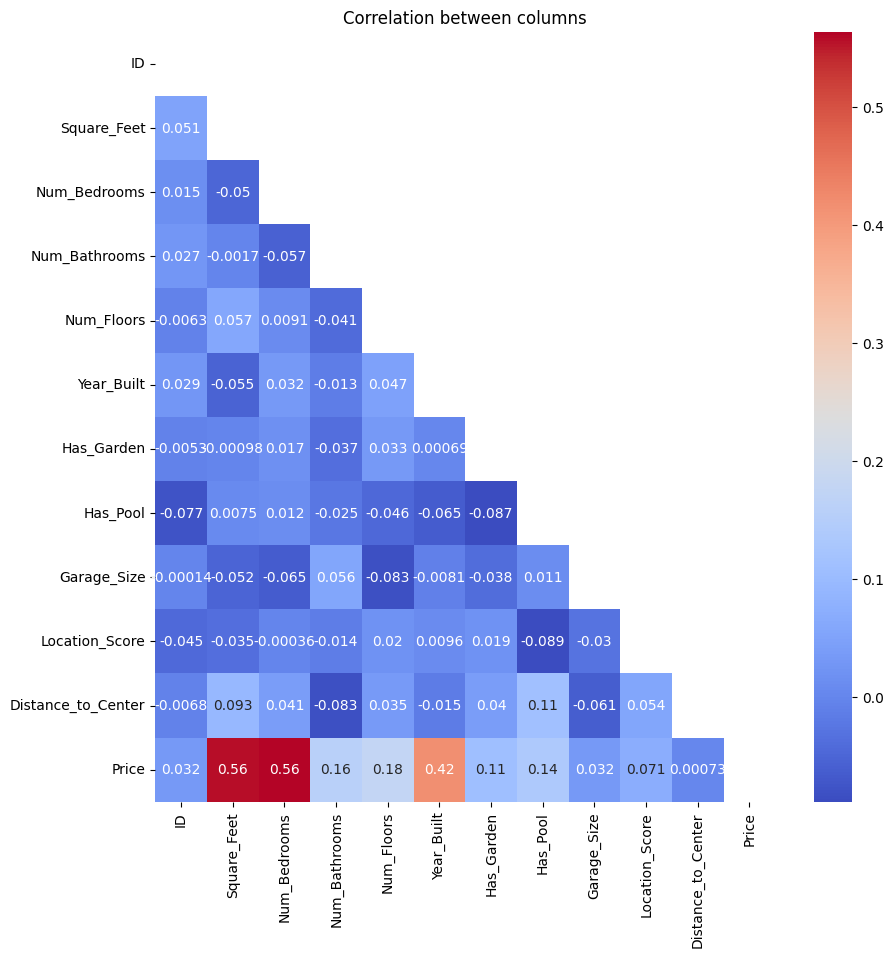

In [31]:
corr_ = df.corr()

plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr_, dtype=float))
sns.heatmap(corr_, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation between columns')
plt.show()

Based on the correlation shown in the above heatmap, there are three main candidate features which has a correlation score around 0.50, and as such, could be used for the model. These features are Square_feet, Num_Bedrooms, and Year_Built.

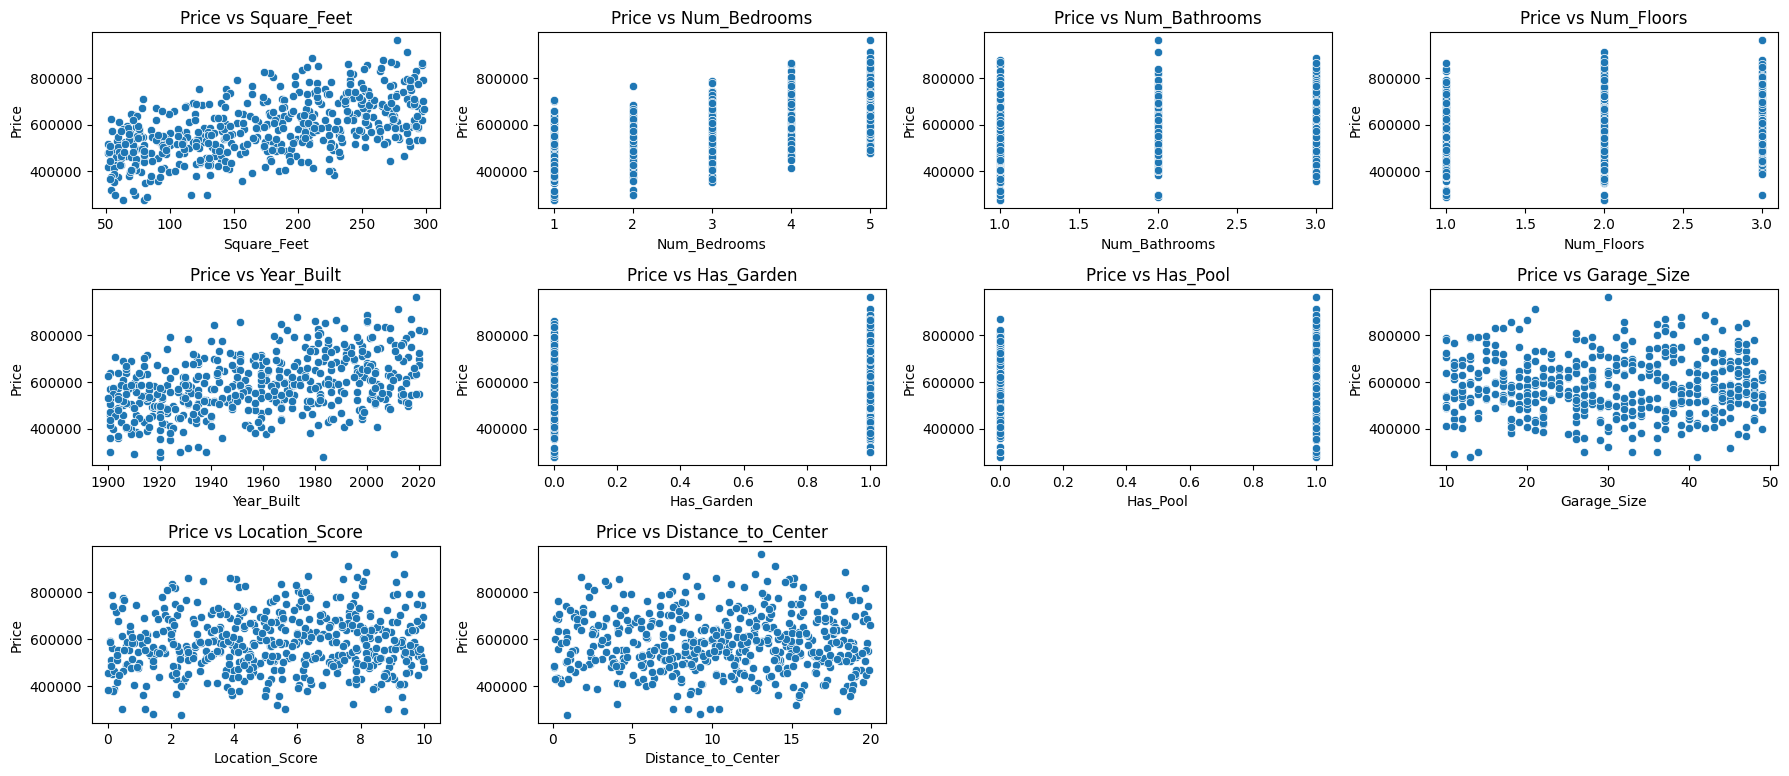

In [32]:
plt.figure(figsize=(18, 10))

cols = [col for col in df.columns if col != 'ID' and col != 'Price']
for i, col in enumerate(cols):
  if col == 'ID' or col == 'Price':
    continue
  plt.subplot(4, 4, i + 1)
  sns.scatterplot(x=df[col], y=df['Price'])
  plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

##**4. Data Cleaning**
---
At this step, the data is cleaned of missing, duplicated, and outlier values. This is done in order to remove any inconsistencies and irrelevant data within the dataset, which would enable better data modelling.

On this step, the following is done in order to clean the data:
1. Outlier handling

###1. Outlier Handling
Since the outlier is found in only a singular column, and on said column there is only a singular outlier, the data is deleted, as it does not affect the original data (insignificant)

In [33]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

outlier = df[(df['Price'] < (q1 - 1.5 * iqr)) | (df['Price'] > (q3 + 1.5 * iqr))].index
df = df.drop(outlier)
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


##**5. Data Preparation**
---
In this step, the dataset is manipulated in order to enable it to be processed by the model. This process would involve several steps, including:
1. **Feature Selection** - this is done in order to more robustly select features that contribute directly to the housing price, augmenting the insight already received from correlation analysis
2. **Data Splitting & Scaling**
    * Data Splitting - this is done to split the dataset into training and testing sets, where the testing set would be used to measure the model's performance
    * Data Scaling - uses standardization, standardize the data distribution, thus improving the model's ability to understand patterns inside the dataset


###1. Feature Selection

In [42]:
x = df[[col for col in df.columns if col != 'Price' and col != 'ID']] # For the predictors, all data is used
y = df['Price']

selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(x, y)

scores = pd.Series(selector.scores_, index=x.columns).sort_values(ascending=False)
scores

,0
Num_Bedrooms,229.105306
Square_Feet,222.967910
Year_Built,102.063113
Num_Floors,15.034014
Num_Bathrooms,12.730481
Has_Pool,8.769545
Has_Garden,5.489314
Location_Score,2.019878
Garage_Size,0.525769
Distance_to_Center,0.002428


Based on the result of the feature selection, it could be said that there are three main features which should be used, which are: Num_Bedrooms, Square_Feet, and Year_Built.

###3. Data Splitting & Scaling

In [45]:
scaler2 = StandardScaler()

x_selected = selector.transform(x)
x_scaled = scaler2.fit_transform(x_selected)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

##**6. Modelling**
---
The model used in this project consists of:
1. **Simple linear regression**
2. **Polynomial regression**
3. **Gradient boosting regression**

The metrics used to evaluate the performance of these models are:
1. **MAE (Mean Absolute Error)** - shows the absolute average of difference between actual and predicted values, a lower MAE shows that the model is more capable of making correct predictions.
2. **MSE (Mean Squared Error)** - shows the average squared difference between actual and predicted values, a lower MSE shows that the model is more capable of making correct predictions.
3. **R2 Score** - shows percentage of actual values' variance that is explained by the model predictions, a higher R2 Score means that the model performs better.

###1. Linear Regression

In [46]:
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 2390425916.8246155
MAE: 39015.644469120445
R2: 0.8220005715235255


###2. Polynomial Regression

In [47]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

reg = LinearRegression()

reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 2386700068.8310714
MAE: 39159.152122061445
R2: 0.822278011124884


###3. Gradient Boost Regression

In [48]:
reg_gb = GradientBoostingRegressor()
reg_gb.fit(x_train, y_train)
y_pred = reg_gb.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 2550337423.1783504
MAE: 41090.88090269899
R2: 0.8100930045341296


##**7. Conclusion**
---
In this project, all algorithms are able to perform reasonably well, having an R2 score of 81-82%. However, the errors are still relatively high, though this could be explained by the fact that the dependent variable (House Prices) are large in nominations, and as such, the errors tend to be in the thousands.

Based on the results of feature selection using Select K-Best, these are the top factors contributing to housing prices:
1. **Num_Bedrooms** - the number of bedrooms a house has, the higher it is, the higher the prices will be.
2. **Square_Feet** - the size of houses in square feet, larger houses tend to be more expensive.
3. **Year_Built** - the year when a house was built, newer houses tend to be more expensive.

Based on the results of three regression algorithms used in this project, it could be concluded that the best performing algorithm (for this specific use case) is the polynomial regression algorithm. Compared to other algorithms used, this algorithm has the lowest error (both in mean squared error and mean absolute error) as well as the highest R2 score.